In [1]:
client_id = "dZld5466VWxrKooDKlSX"
client_secret = "VOaxDMgBwa"

client_id = "CLIENT_ID"
client_secret = "CLIENT_SECRET"

In [26]:
##### 요청 URL를 작성, 요청결과를 json 형식으로 변환하여 return 한다. 
import requests
import json
import urllib.request
from urllib.parse import quote


client_id = "dZld5466VWxrKooDKlSX"
client_secret = "VOaxDMgBwa"


def call(keyword, start):
    encText = quote(keyword)
    url = "https://openapi.naver.com/v1/search/blog?query=" + encText +"&sort=sim&display=100&start="+str(start)
    result = requests.get(url=url, headers ={"X-Naver-Client-Id":client_id, "X-Naver-Client-Secret":client_secret} )
#     print(result)
    return result.json() 

In [27]:
call('김천',1)

{'lastBuildDate': 'Thu, 21 Sep 2023 01:44:06 +0900',
 'total': 968001,
 'start': 1,
 'display': 100,
 'items': [{'title': '<b>김천</b> 구미철거 처음부터 끝까지 완벽했어요',
   'link': 'https://blog.naver.com/hanada7486/223211610825',
   'description': '그런 만큼 지인분께서 미리 경험하시고 검증한 뒤에 <b>김천</b>철거업체를 추천해 주셔서 안심되는 부분도... 또 먼지도 염려했던 것 중 하나였지만 그것도 <b>김천</b>철거업체에서 알아서 센스 있게 작업하셨고 덕분에... ',
   'bloggername': '라임그린쉬폰스카프',
   'bloggerlink': 'blog.naver.com/hanada7486',
   'postdate': '20230914'},
  {'title': '구미철거 <b>김천</b>철거 완벽하게 해주셨어요',
   'link': 'https://blog.naver.com/91photoe/223209756421',
   'description': '&quot; 구미철거 <b>김천</b>철거 완벽하게 해주셨어요 &quot; 오랜기간 창업을 해온 식당을 경제적인 이유로 폐업을... 구미철거 <b>김천</b>철거 업체를 찾아 철거문의를 받게 되었어요 코로나 이후에 저희처럼 폐업하는 분들도 많고... ',
   'bloggername': '가제행정부 :: 가전제품 행사정보를 부탁해',
   'bloggerlink': 'blog.naver.com/91photoe',
   'postdate': '20230913'},
  {'title': '<b>김천</b> 철거 구미 철거 허가받은 곳에서',
   'link': 'https://blog.naver.com/jy0519i/223208470684',
   'description': '그런데 이렇게 대충 아무 곳이나 선정해서 <b>김

In [28]:
D= call('김천',1)
D.keys()

dict_keys(['lastBuildDate', 'total', 'start', 'display', 'items'])

In [29]:
D["items"][0]['description']

'그런 만큼 지인분께서 미리 경험하시고 검증한 뒤에 <b>김천</b>철거업체를 추천해 주셔서 안심되는 부분도... 또 먼지도 염려했던 것 중 하나였지만 그것도 <b>김천</b>철거업체에서 알아서 센스 있게 작업하셨고 덕분에... '

In [30]:
def search(keyword):
    lst = []
    for page in range(0,10):  # [0,1,2,3,4,5,6,7,8,9]
        lst = lst + call(keyword, page *100 +1)['items']
    return lst

In [31]:
# html tag 제거 함수 설치: !pip install bs4
from bs4 import BeautifulSoup 

def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()   

In [32]:
# 함수 호출
import json

s_list=[]
s = search('김천')
s_list = s_list + s
file = open('search.json', 'w+')
file.write(json.dumps(s_list))

import pandas as pd

df = pd.read_json('search.json')
df.to_csv('naverblog_city.csv', encoding ='utf-8', index=False)

#csv 파일 읽어오기
df = pd.read_csv('naverblog_city.csv')
# df.columns
# df.info()
# html tag 제거 함수 호출  20230119
df['title'] = df['title'].apply(remove_html_tags)
df['description'] = df['description'].apply(remove_html_tags)
df

,title,link,description,bloggername,bloggerlink,postdate
0,김천 구미철거 처음부터 끝까지 완벽했어요,https://blog.naver.com/hanada7486/223211610825,그런 만큼 지인분께서 미리 경험하시고 검증한 뒤에 김천철거업체를 추천해 주셔서 안심...,라임그린쉬폰스카프,blog.naver.com/hanada7486,20230914
1,구미철거 김천철거 완벽하게 해주셨어요,https://blog.naver.com/91photoe/223209756421,""" 구미철거 김천철거 완벽하게 해주셨어요 "" 오랜기간 창업을 해온 식당을 경제적인 ...",가제행정부 :: 가전제품 행사정보를 부탁해,blog.naver.com/91photoe,20230913
2,김천 철거 구미 철거 허가받은 곳에서,https://blog.naver.com/jy0519i/223208470684,그런데 이렇게 대충 아무 곳이나 선정해서 김천 철거 일을 맡기게 되면 자칫 허가받지...,꿈틀꿈틀 꿈틀이네,blog.naver.com/jy0519i,20230911
3,김천철거 구미철거 퍼펙트한 마무리,https://blog.naver.com/narelove168/223200017787,비용에 있어서 김천철거 업체마다 정말 차이가 크다는 것을 알게 되었어요. 무턱대고 ...,하쿠나마타타,blog.naver.com/narelove168,20230901
4,김천 아포 천년가 민간임대 공급안내,https://blog.naver.com/dodomaru3/223202362106,김천 아포 천년가 민간임대 공급안내 전국 부동산 시장에 관망세가 이어지는 가운데 탄...,재벌집 라이프~!!,blog.naver.com/dodomaru3,20230904
...,...,...,...,...,...,...
995,김천 교동 조각공원길) 유리의 성에서 마시는 커피 한 잔...,https://blog.naver.com/limystyleil/223208605509,김천 직지사 근처 허영만 백반기행 출현 맛집 여가 에서 든든히~ 가족식사를 마치고 ...,털보아저씨의 빛바랜 수첩,blog.naver.com/limystyleil,20230911
996,[창의쑥쑥 그림책 & 레고교실] - 김천시립도서관 문화강좌...,https://blog.naver.com/lovehw2309/223212870086,[창의쑥쑥 그림책 & 레고교실] - 김천시립도서관 문화강좌 프로그램 작은도서관 인기...,아포진등교회 & 마을N작은도서관,blog.naver.com/lovehw2309,20230916
997,김천 쪽갈비 율곡동 맛집 치명적인 쪽갈비 김천혁신점,https://blog.naver.com/kjk288445/223192862761,"✔️주소 : 김천시 혁신3로 5, 153호 ✔️전화번호 : 0507 - 1356 -...",yummy,blog.naver.com/kjk288445,20230825
998,"김천떡집 대신떡방앗간, 생일떡 맞춤떡 백설기 돌떡 행사떡",https://blog.naver.com/mbook1026/223016272960,김천아포 대신떡방앗간 김천 40년 정통 대신떡집 대신떡방앗간 매일 7시부터 22시까...,육아맘 핫플 꿀팁,blog.naver.com/mbook1026,20230215


In [33]:
!pip install wordcloud

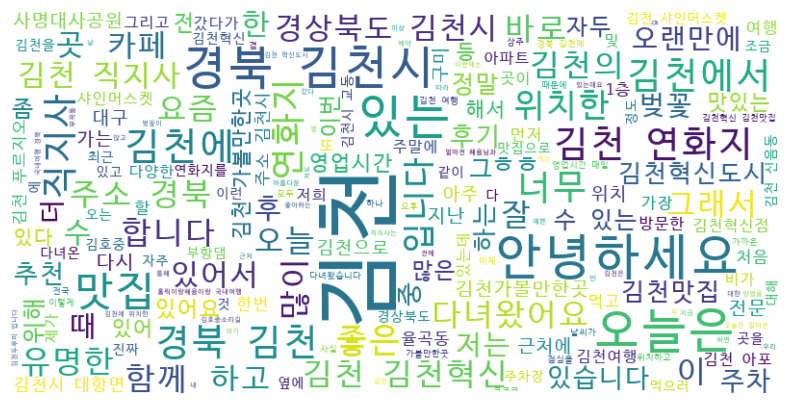

In [34]:
# WorldCloud 시각화
# 모듈 import
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import font_manager
# 한글font 경로지정
font_path ='C:\python\D2Coding\D2Coding.ttf'
# 한글font 설정
fontprop = font_manager.FontProperties(fname=font_path)
# df['description'] 컬럼의 모든 텍스트를 하나의 문자열로 
text = ' '.join(df['description'].values)
# WorldCloud 객체 생성
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text)
# 워드클라우드를 matplotlib으로 시각화
plt.figure(figsize=(10, 5))    
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

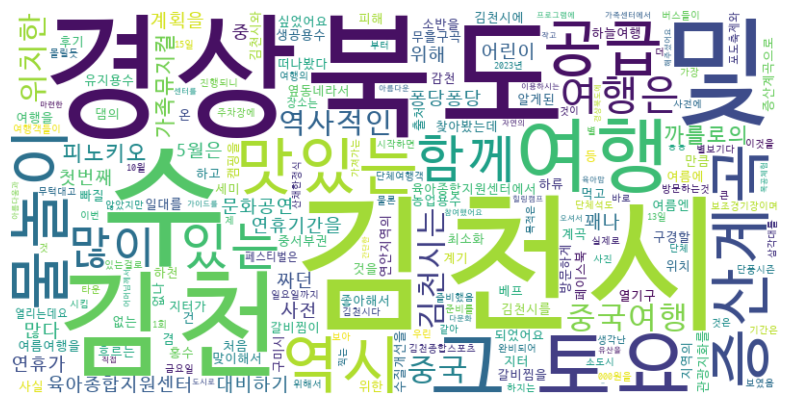

In [18]:
# 네이버 검색 API 예제 - 블로그 검색
import os
import sys
import urllib.request
import json

client_id = "dZld5466VWxrKooDKlSX"
client_secret = "VOaxDMgBwa"
encText = urllib.parse.quote("김천시 여행")
url = "https://openapi.naver.com/v1/search/blog?query=" + encText # JSON 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):   # 서버와 통신이 successfull
    response_body = response.read()
#     print(response_body.decode('utf-8'))
    response_data = response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)

result = json.loads(response_data)
# print(result)
# type(result)
# print(result["items"])

# 데이터 프레임 만들기 =>행과 열로 구성된 sheet
import pandas as pd

df = pd.DataFrame(result["items"])

# 데이터 프레임을 CSV 파일로 저장
df.to_csv("traval.csv", index=False)

# BeautifulSoup 사용하여 html tag 제거 하는 함수 정의
from bs4 import BeautifulSoup

def remove_html_tags(text): # text는 html형식의 문자열
    soup = BeautifulSoup(text,"html.parser")
    return soup.get_text() # html 태그를 제거하여 텍스트를 리턴

# 'description' 열의 html tag 제거
df['description']=  df['description'].apply(remove_html_tags)
df['title']=  df['title'].apply(remove_html_tags)

# 수정된 데이터 프레임을 저장
df.to_csv('traval_modified.csv', index=False)

df = pd.read_csv("traval_modified.csv")

# ! pip install bs4
# !pip install wordcloud

#WordCloud 시각화
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
from wordcloud import WordCloud

#한글 폰트 경로 지정
font_path = 'C:\python\D2Coding\D2Coding.ttf'
# 한글 폰트 설정
fontprop = font_manager.FontProperties(fname=font_path)

# 데이터 프레임의 'description'의 모든 텍스트를 하나의 문자열로 결합
text = ' '.join(df['description'].values)

# WordCloud 객체 생성 및 워드클라우드 생성
wordcloud = WordCloud(width=800, height = 400, background_color='white', font_path=font_path).generate(text)

# 워드클라우드를 matplotlib으로 시각화
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()